# Importance Sampling Monte Carlo Integration

In [1]:
using Random
using Plots

## The Uniform sampling method

The Integrad $\int_0^1 e^{-x^2} dx$

Can be expanded as:
$$
I = \int_0^1 e^{-x^2} dx = \int_0^1 e^{-x^2} 1 dx = \langle e^{-x^2} \rangle _{x\sim U(0,1)}
$$

Which can be approximated by the Central Limit theorem.

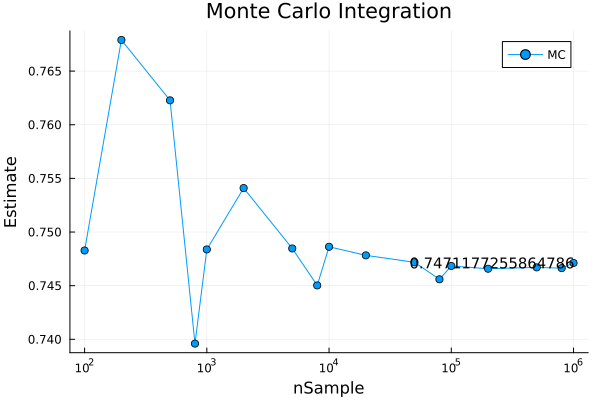

In [21]:
@. Integrand(x) = exp(-x^2)

function IntegrateMC(nSample)
    x = rand(nSample)
    y = Integrand(x)
    return sum(y)/nSample
end

nSampleList =  [100,200,500,800,1000,2000,5000,8000,10000,20000,50000,80000,100000,200000,500000,800000,1000000]

result = [IntegrateMC(nSample) for nSample in nSampleList]

plot(nSampleList, result, xaxis=:log, label="MC", marker=:circle,xlabel="nSample", ylabel="Estimate", title="Monte Carlo Integration")

# annotate result[-1]
annotate!([(nSampleList[end], result[end], text("$(result[end])", 10, :right))])

## Importance Sampling

If we know some prior knowledge about the Integrand, such as

$
f(x)\leq e^{-x}, x\in [0,1]
$

We can conduct an sampling based on importance.

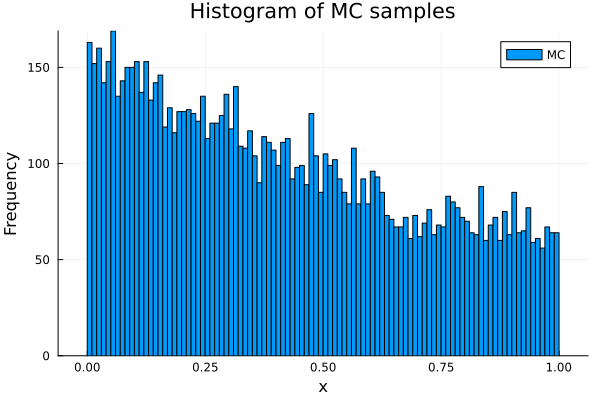

In [29]:
upLimitInt(x) = exp(-x)

include("/home/zgd/projects/GithubRepos/myExploration/computationalPhysicsCourses/global/pdfSample.jl")

interval = (0.0, 1.0)
x = pdf2random(10000,upLimitInt,interval)
y = Integrand(x)
histogram(x, bins=100, label="MC", xlabel="x", ylabel="Frequency", title="Histogram of MC samples")

In [35]:
@. upLimitInt(x) = exp(-x)
interval = (0.0, 1.0)
function ImprotanceMC(nSample)
    x = pdf2random(nSample,upLimitInt,interval)
    y = Integrand(x)/upLimitInt(x)
    return sum(y)/nSample
end

nSampleList =  [100,200,500,800,1000,2000,5000,8000,10000,20000,50000,80000,100000,200000,500000,800000,1000000]

result = [IntegrateMC(nSample) for nSample in nSampleList]

17-element Vector{Float64}:
 0.7449770482799901
 0.7230647929005992
 0.7520765275049988
 0.7448008441453723
 0.7506574147493499
 0.7522874234737219
 0.7474430419794338
 0.749187058718783
 0.74593392975673
 0.7463441891934113
 0.7456841581968722
 0.7463879280829544
 0.7475279412704594
 0.7465477439096386
 0.7470443242536102
 0.7466415418983144
 0.7467505005322648

**Comment**

This Importance based sampling has boosted convergence speed vs nSample significantly.

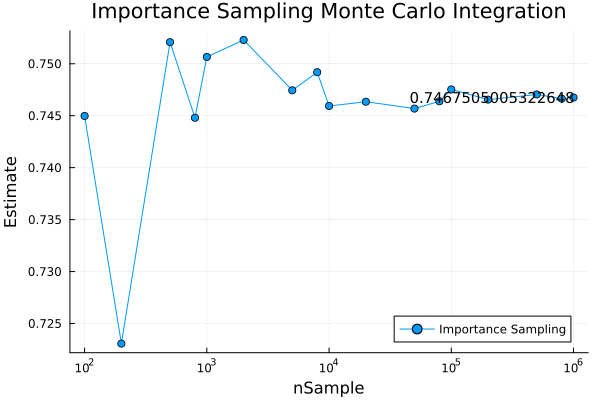

In [37]:
plot(nSampleList, result, xaxis=:log, label="Importance Sampling", marker=:circle, xlabel="nSample", ylabel="Estimate", title="Importance Sampling Monte Carlo Integration")

# annotate result_importance[-1]
annotate!([(nSampleList[end], result[end], text("$(result[end])", 10, :right))])